/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets inclu

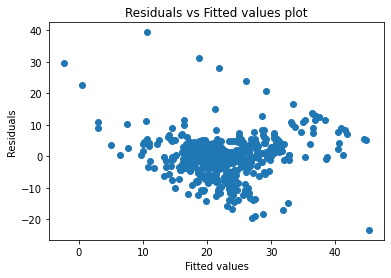

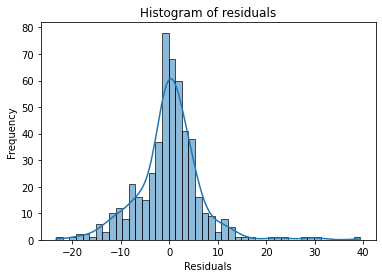

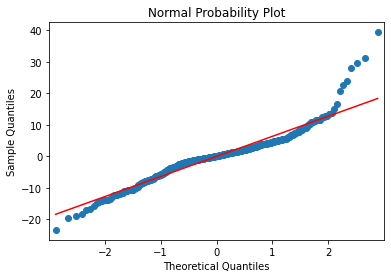

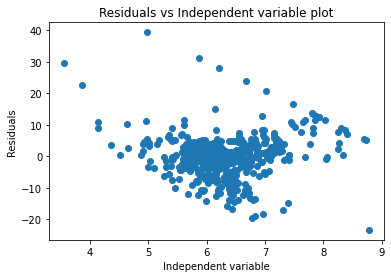

Breusch-Pagan test p-value: 0.9333833565387878


AttributeError: module 'statsmodels.stats.api' has no attribute 'normaltest'

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

# Load Boston Housing dataset
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target

# Define the dependent and independent variables
y = df['MEDV']
X = df[['RM']]

# Add constant to the independent variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Calculate the predicted values
y_pred = model.predict(X)

# Residuals
residuals = y - y_pred

# Visualize the residuals vs fitted values plot
plt.scatter(y_pred, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values plot')
plt.show()

# Visualize the histogram of residuals
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of residuals')
plt.show()

# Visualize the normal probability plot
sm.qqplot(residuals, line='r')
plt.title('Normal Probability Plot')
plt.show()

# Visualize the scatterplot of residuals vs independent variable
plt.scatter(X['RM'], residuals)
plt.xlabel('Independent variable')
plt.ylabel('Residuals')
plt.title('Residuals vs Independent variable plot')
plt.show()

# Test for homoscedasticity
_, p_value, _, _ = sm.stats.diagnostic.het_breuschpagan(residuals, X)
print('Breusch-Pagan test p-value:', p_value)

# Test for normality of residuals
_, p_value = sm.stats.normaltest(residuals)
print('Normality test p-value:', p_value)

# Test for linearity of the model
_, p_value, _, _ = sm.stats.diagnostic.linear_rainbow(model)
print('Linearity test p-value:', p_value)

# Test for autocorrelation of residuals
acf = sm.tsa.stattools.acf(residuals, nlags=20, qstat=True)
q_stat = acf[2]
p_values = 1 - sm.stats.distributions.chi2.cdf(q_stat, range(1, 20))
print('Autocorrelation test p-values:', p_values)
